In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
train_data=pd.read_csv("C:\\Arvind Files\\ML PROJECT FILES\\house-prices-advanced-regression-techniques\\train.csv",engine='python')

In [137]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


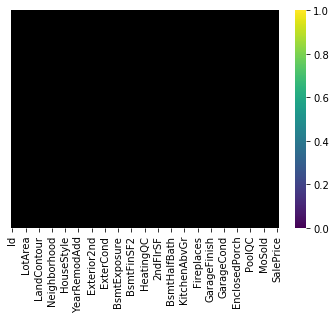

In [138]:
sns.heatmap(train_data.isnull(),cmap='viridis',linewidth=3,linecolor='black',yticklabels=False)

In [139]:
corr=train_data.corr()
print(corr['SalePrice']>0.5)

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual       True
OverallCond      False
YearBuilt         True
YearRemodAdd      True
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath          True
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces       False
GarageYrBlt      False
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice         True
Name: SalePrice, dtype: bool


In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X=train_data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
y=train_data['SalePrice']
X[X==np.inf]=np.nan
X.fillna(X.mean(), inplace=True)
y[y==np.inf]=np.nan
y.fillna(X.mean(),inplace=True)

C:\Users\arvind\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\arvind\Anaconda3\lib\site-packages\pandas\core\frame.py:3160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\arvind\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [142]:
X.isnull().any

<bound method DataFrame.any of       OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0           False      False         False        False     False      False   
1           False      False         False        False     False      False   
2           False      False         False        False     False      False   
3           False      False         False        False     False      False   
4           False      False         False        False     False      False   
5           False      False         False        False     False      False   
6           False      False         False        False     False      False   
7           False      False         False        False     False      False   
8           False      False         False        False     False      False   
9           False      False         False        False     False      False   
10          False      False         False        False     False      False   
11       

In [143]:
y.isnull().any

<bound method Series.any of 0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1430    False
1431    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
1438    False
1439    False
1440    False
1441    False
1442    False
1443    False
1444    False
1445    False
1446    False
1447    False
1448    False
1449    False
1450    False
1451    False
1452    False
1453    False
1454    False
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool>

In [144]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb 

In [145]:
model=xgb.XGBRegressor()

In [146]:
rfe=RFE(model,10)

In [147]:
X_rfe=rfe.fit_transform(X,y)

[20:16:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [148]:
model.fit(X_rfe,y)

[20:16:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [149]:
print(rfe.support_)

[ True  True  True  True  True  True  True  True  True  True]


In [150]:
# NOW WE KNOW WHAT ARE THE BEST FEATURES FOR THE TARGET_VARIABLE NOW ITS TIME TO TUNE HYPERPARAMETERS

In [151]:
from sklearn.grid_search import GridSearchCV

In [152]:
param_grid={'max_depth':[0,2,4,6,8,10]}

In [153]:
grid=GridSearchCV(model,param_grid,verbose=2)

In [154]:
grid.fit(X,y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] max_depth=0 .....................................................
[20:16:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............................................ max_depth=0 -   0.0s
[CV] max_depth=0 .....................................................
[20:16:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............................................ max_depth=0 -   0.0s
[CV] max_depth=0 .....................................................
[20:16:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............................................ max_depth=0 -   0.0s
[CV] max_depth=2 .....

C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ............................................ max_depth=2 -   0.0s
[CV] max_depth=2 .....................................................
[20:16:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............................................ max_depth=2 -   0.0s
[CV] max_depth=2 .....................................................
[20:16:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............................................ max_depth=2 -   0.0s
[CV] max_depth=4 .....................................................
[20:16:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ............................................ max_depth=4 -   0.0s
[CV] max_depth=4 .....................................................
[20:16:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............................................ max_depth=4 -   0.0s
[CV] max_depth=4 .....................................................
[20:16:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ............................................ max_depth=4 -   0.0s
[CV] max_depth=6 .....................................................
[20:16:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............................................ max_depth=6 -   0.1s
[CV] max_depth=6 .....................................................
[20:16:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ............................................ max_depth=6 -   0.1s
[CV] max_depth=6 .....................................................
[20:16:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............................................ max_depth=6 -   0.1s
[CV] max_depth=8 .....................................................
[20:16:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ............................................ max_depth=8 -   0.1s
[CV] max_depth=8 .....................................................
[20:16:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............................................ max_depth=8 -   0.1s


C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] max_depth=8 .....................................................
[20:16:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............................................ max_depth=8 -   0.1s


C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] max_depth=10 ....................................................
[20:16:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ........................................... max_depth=10 -   0.2s
[CV] max_depth=10 ....................................................
[20:16:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ........................................... max_depth=10 -   0.1s
[CV] max_depth=10 ....................................................
[20:16:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ........................................... max_depth=10 -   0.1s
[20:16:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    2.5s finished
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [0, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [155]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [156]:
grid.best_params_

{'max_depth': 4}

In [157]:
model=xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=200, verbosity=1, silent=None, objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain')

In [158]:
model.fit(X,y)

C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:16:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [159]:
test_data=pd.read_csv('C:\\Arvind Files\\ML PROJECT FILES\\house-prices-advanced-regression-techniques\\test.csv',engine='python')

In [160]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


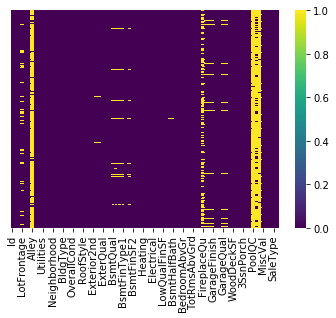

In [161]:
sns.heatmap(test_data.isnull(),cmap='viridis',yticklabels=False)

In [162]:
X_test=test_data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
print(X_test)

      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               5       1961          1961        882.0       896        896   
1               6       1958          1958       1329.0      1329       1329   
2               5       1997          1998        928.0       928       1629   
3               6       1998          1998        926.0       926       1604   
4               8       1992          1992       1280.0      1280       1280   
5               6       1993          1994        763.0       763       1655   
6               6       1992          2007       1168.0      1187       1187   
7               6       1998          1998        789.0       789       1465   
8               7       1990          1990       1300.0      1341       1341   
9               4       1970          1970        882.0       882        882   
10              7       1999          1999       1405.0      1337       1337   
11              6       1971          19

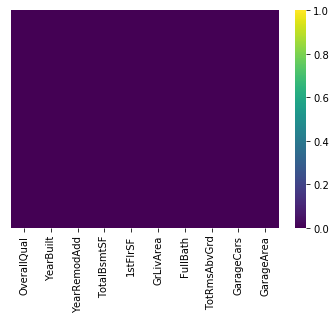

In [163]:
sns.heatmap(X_test.isnull(),cmap='viridis',yticklabels=False)

In [164]:
X_test.fillna(value=0,axis=1,inplace=True)

C:\Users\arvind\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [165]:
X_test.isnull().any()

OverallQual     False
YearBuilt       False
YearRemodAdd    False
TotalBsmtSF     False
1stFlrSF        False
GrLivArea       False
FullBath        False
TotRmsAbvGrd    False
GarageCars      False
GarageArea      False
dtype: bool

In [166]:
pred1=model.predict(X_test)

In [167]:
print(len(pred1))

1459


In [168]:
dataframe=pd.DataFrame(test_data['Id'],columns=['Id'])

In [169]:
print(dataframe)

        Id
0     1461
1     1462
2     1463
3     1464
4     1465
5     1466
6     1467
7     1468
8     1469
9     1470
10    1471
11    1472
12    1473
13    1474
14    1475
15    1476
16    1477
17    1478
18    1479
19    1480
20    1481
21    1482
22    1483
23    1484
24    1485
25    1486
26    1487
27    1488
28    1489
29    1490
...    ...
1429  2890
1430  2891
1431  2892
1432  2893
1433  2894
1434  2895
1435  2896
1436  2897
1437  2898
1438  2899
1439  2900
1440  2901
1441  2902
1442  2903
1443  2904
1444  2905
1445  2906
1446  2907
1447  2908
1448  2909
1449  2910
1450  2911
1451  2912
1452  2913
1453  2914
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]


In [170]:
dataframe['SalePrice']=pred1

In [171]:
print(dataframe)

        Id      SalePrice
0     1461  128258.359375
1     1462  142494.281250
2     1463  162735.781250
3     1464  180935.359375
4     1465  209864.187500
5     1466  177223.500000
6     1467  167192.515625
7     1468  171831.593750
8     1469  182367.906250
9     1470  115883.828125
10    1471  191206.703125
11    1472   93617.765625
12    1473   97288.515625
13    1474  157191.984375
14    1475  139442.031250
15    1476  392744.375000
16    1477  252406.078125
17    1478  328559.343750
18    1479  295867.000000
19    1480  501039.312500
20    1481  348868.343750
21    1482  215460.500000
22    1483  182872.250000
23    1484  168573.000000
24    1485  166534.656250
25    1486  199259.812500
26    1487  361148.312500
27    1488  259781.625000
28    1489  217485.250000
29    1490  187819.390625
...    ...            ...
1429  2890   58203.941406
1430  2891  136950.796875
1431  2892   57579.394531
1432  2893  105034.742188
1433  2894   47918.921875
1434  2895  301909.718750
1435  2896  

In [172]:
#NOW CONVERTING DATAFRAME TO CSV FILE AND PLACING IT IN DESKTOP

In [173]:
path='C:\\Users\\arvind\\Desktop\\'

In [174]:
import os
dataframe.to_csv(os.path.join(path,r'sample_submission.csv'),index=False)